In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

alessiotzng_training_set_path = kagglehub.dataset_download('alessiotzng/training-set')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/training-set/training_set.npz


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as tfkl
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

np.random.seed(42)
tf.random.set_seed(42);

In [ ]:
data = np.load('/kaggle/input/training-set/training_set.npz')
x = data['images']
y = data['labels']
x = x[0:11959, : , :]
y = y[0:11959, : ]
print("x shape:", x.shape)
print("y shape:", y.shape)
x = x.astype('float32') / 255.0
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=1/3, random_state=42)

y_train = to_categorical(y_train, num_classes=8)
y_test = to_categorical(y_test, num_classes=8)
y_val = to_categorical(y_val, num_classes=8)

print("train_shape:", x_train.shape, y_train.shape)
print("test_shape:", x_test.shape, y_test.shape)

x shape: (11959, 96, 96, 3)
y shape: (11959, 1)
train_shape: (8371, 96, 96, 3) (8371, 8)
test_shape: (2392, 96, 96, 3) (2392, 8)


In [ ]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=360,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True,
    #brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)
datagen.fit(x_train)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=360,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True,
    #brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)
datagen.fit(x_val)


Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


130/130 ━━━━━━━━━━━━━━━━━━━━ 62s 285ms/step - accuracy: 0.7043 - loss: 1.3551 - val_accuracy: 0.8108 - val_loss: 0.9824
Epoch 2/100
  1/130 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.7500 - loss: 1.0198

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


130/130 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.7500 - loss: 1.0198 - val_accuracy: 0.7273 - val_loss: 1.0003
Epoch 3/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 21s 153ms/step - accuracy: 0.8101 - loss: 1.0483 - val_accuracy: 0.8429 - val_loss: 0.8698
Epoch 4/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8906 - loss: 0.8158 - val_accuracy: 0.9091 - val_loss: 0.6166
Epoch 5/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 21s 150ms/step - accuracy: 0.8128 - loss: 0.9987 - val_accuracy: 0.8663 - val_loss: 0.8445
Epoch 6/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.7812 - loss: 0.9793 - val_accuracy: 0.9318 - val_loss: 0.6265
Epoch 7/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 20s 150ms/step - accuracy: 0.8187 - loss: 0.9565 - val_accuracy: 0.8559 - val_loss: 0.7494
Epoch 8/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.8438 - loss: 0.7961 - val_accuracy: 0.7727 - val_loss: 0.8941
Epoch 9/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 21s 151ms/step - accuracy: 0.8276 - loss: 0.8714 - val

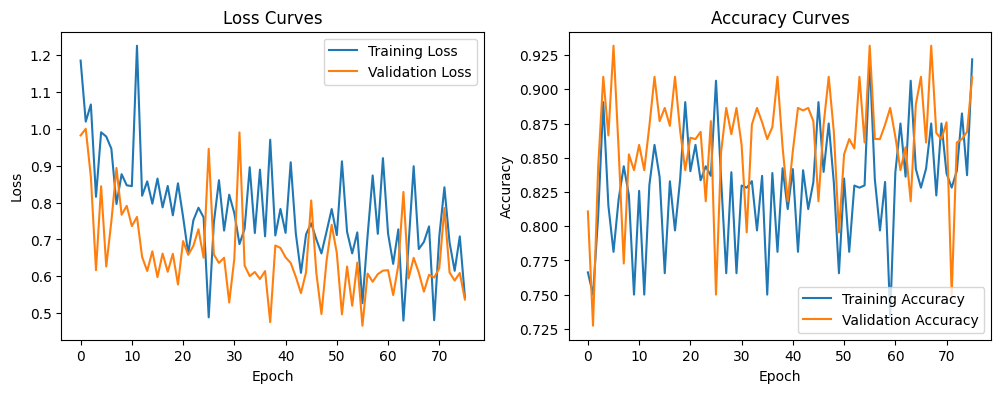

75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 162ms/step
Confusion Matrix:
 [[164   0   0   7   0   0   0   0]
 [  2 387   0   5   1   8   9   0]
 [  2   1 192   2   2   2   2   2]
 [ 36   0  11 286   1  37  11   0]
 [  3   0   8   8 147   8   0   0]
 [  5   0   1  17   2 179   2   0]
 [  1   7   8  31   1   6 459   0]
 [  0   0   5   2   1   0   0 321]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.96      0.85       171
           1       0.98      0.94      0.96       412
           2       0.85      0.94      0.89       205
           3       0.80      0.75      0.77       382
           4       0.95      0.84      0.89       174
           5       0.75      0.87      0.80       206
           6       0.95      0.89      0.92       513
           7       0.99      0.98      0.98       329

    accuracy                           0.89      2392
   macro avg       0.88      0.90      0.89      2392
weighted avg       0.90      0.89     

In [ ]:
#pretrained model
from tensorflow.keras.applications import DenseNet169
def build_DenseNet169(num_classes=2):
    inputs = tfkl.Input(shape=(96, 96, 3))

    model = DenseNet169(include_top=False, input_shape=(96, 96, 3), weights="imagenet", input_tensor=inputs)

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = tfkl.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = tfkl.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = tfkl.Dropout(top_dropout_rate, name="top_dropout")(x)
    x = tfkl.Dense(
        num_classes,
        kernel_regularizer=tfk.regularizers.L1L2(1e-3),
        name="pred")(x)
    outputs = tfkl.Activation('softmax', dtype='float32')(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="DenseNet169")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    #model.summary()

    return model

model = build_DenseNet169(8)

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Balance weights
class_weights = class_weight.compute_class_weight('balanced'
                                               ,classes=np.unique(np.argmax(y_train, axis=1))
                                               ,y=np.argmax(y_train, axis=1))

train_class_weights = dict(enumerate(class_weights))

# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64), validation_data=datagen.flow(x_val, y_val, batch_size=64), epochs=100,
                    steps_per_epoch=len(x_train)//64, validation_steps = len(x_val) // 64, callbacks=[early_stopping],
                   class_weight=train_class_weights)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

# Plot training and validation loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss Curves")

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy Curves")

plt.show()

from sklearn.metrics import confusion_matrix, classification_report

# Predict class labels for test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate and print the confusion matrix and classification report
conf_mat = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:\n", conf_mat)

class_report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:\n", class_report)


model.save('weights.keras')

In [ ]:
%%writefile model.py
import numpy as np

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl


class Model:
    def __init__(self):
        """
        Initialize the internal state of the model. Note that the __init__
        method cannot accept any arguments.

        The following is an example loading the weights of a pre-trained
        model.
        """
        self.neural_network = tfk.models.load_model('weights.keras')

    def predict(self, X):
        """
        Predict the labels corresponding to the input X. Note that X is a numpy
        array of shape (n_samples, 96, 96, 3) and the output should be a numpy
        array of shape (n_samples,). Therefore, outputs must no be one-hot
        encoded.

        The following is an example of a prediction from the pre-trained model
        loaded in the __init__ method.
        """
        X = X.astype('float32') / 255.0
        preds = self.neural_network.predict(X)
        if len(preds.shape) == 2:
            preds = np.argmax(preds, axis=1)
        return preds


Writing model.py


In [ ]:
from datetime import datetime
filename = f'submission_{datetime.now().strftime("%y%m%d_%H%M%S")}.zip'

# Add files to the zip command if needed
!zip {filename} model.py weights.keras


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  adding: model.py (deflated 55%)
  adding: weights.keras (deflated 7%)
